# Vsini tutorial

In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import neidspec
import numpy as np
from neidspec import utils, spec_help
utils
#sys.path.pop(0)

<module 'neidspec.utils' from '/home/tehan/PycharmProjects/neidspec/neidspec/utils.py'>

In [2]:
# Read in three target star spectra
H1 = neidspec.NEIDSpectrum("../neidspec/data/neid/spectra/neidL2_20220429T075531.fits",ccf_redshift=True)
H2 = neidspec.NEIDSpectrum("../neidspec/data/neid/spectra/neidL2_20220410T085645.fits",ccf_redshift=True)
H3 = neidspec.NEIDSpectrum("../neidspec/data/neid/spectra/neidL2_20220419T032546.fits",ccf_redshift=True)

/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:289: RuntimeWarning: divide by zero encountered in divide
  self.f_sky_debl = self.hdu[2].data[s:e] * self.exptime / hdu[2].data[s:e]
/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:289: RuntimeWarning: invalid value encountered in divide
  self.f_sky_debl = self.hdu[2].data[s:e] * self.exptime / hdu[2].data[s:e]
/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:294: RuntimeWarning: invalid value encountered in divide
  self.f_debl[i] = self.f_debl[i] / np.nanmedian(self.f_debl[i])


Text(0, 0.5, 'Normalized Flux')

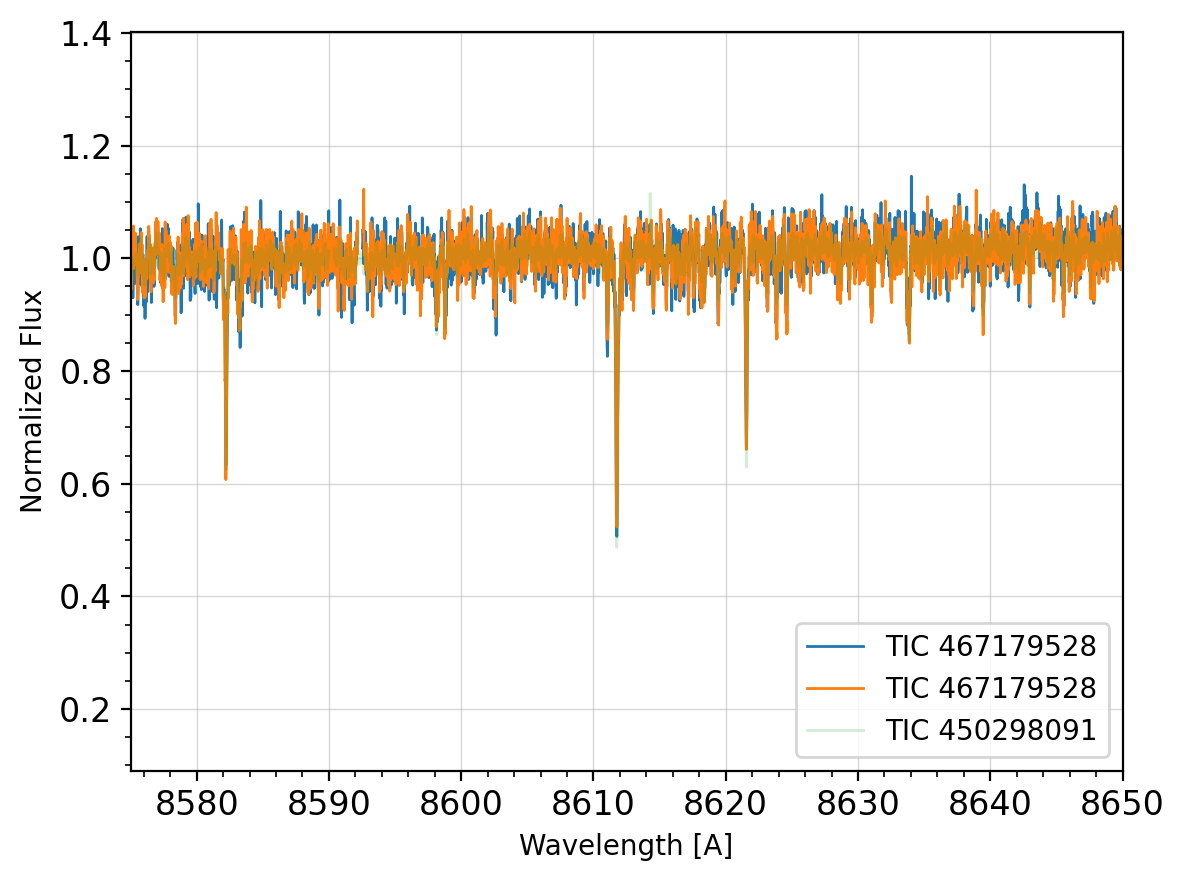

In [3]:
# Lets overplot both of them and see that they line up
# Lets take a look at the TiO bandhead at ~8860A
# G 227-22 is definitely broader
# G 9-40 is shallower in the TiO band (earlier spectral type)
fig, ax = plt.subplots(dpi=200)
o = 102 #55,56,57,94
o -= 10
ax.plot(H1.w_shifted[o],H1.f_debl[o],lw=1,label=H1.object)
ax.plot(H2.w_shifted[o],H2.f_debl[o],lw=1,label=H2.object)
ax.plot(H3.w_shifted[o],H3.f_debl[o],lw=1,alpha=0.2,label=H3.object)
utils.ax_apply_settings(ax)
ax.legend(loc='lower right')
ax.set_xlim(8575,8650)
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Normalized Flux')

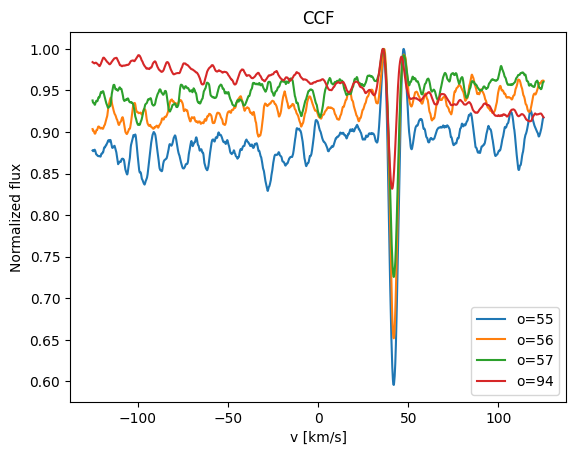

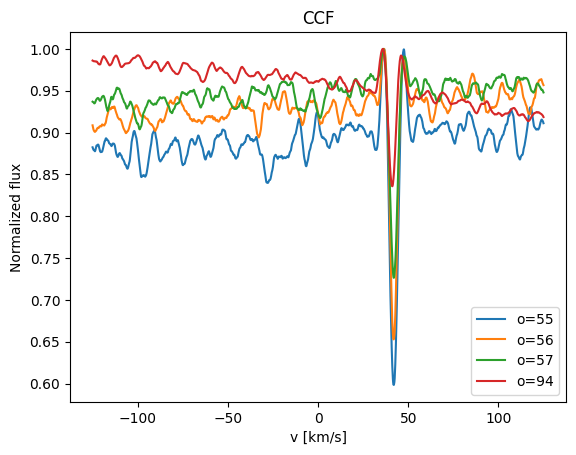

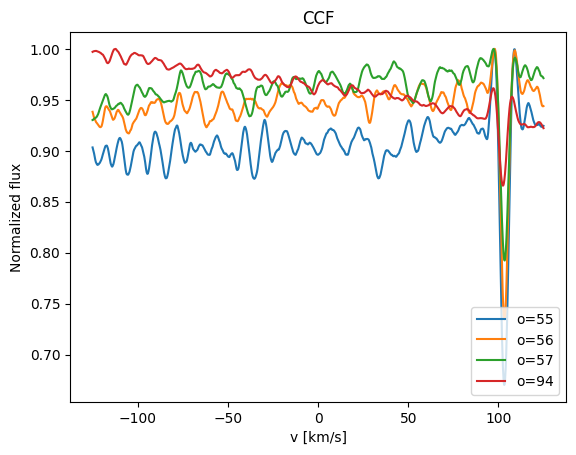

In [4]:
# Lets take a look at CCFs
v = np.linspace(-125.,125.,1501)
orders = [55,56,57,94]
CCF1 = H1.calculate_ccf_for_orders(v,orders=orders,plot=True)
CCF2 = H2.calculate_ccf_for_orders(v,orders=orders,plot=True)
CCF3 = H3.calculate_ccf_for_orders(v,orders=orders,plot=True)

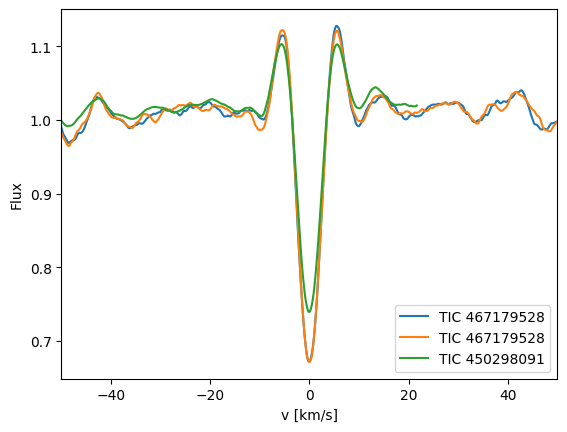

In [5]:
# Lets line all of them up
fig, ax = plt.subplots(dpi=100)
o = 55
o -= 10
ax.plot(v-H1.rv,CCF1[o]/np.median(CCF1[o]),label=H1.object)
ax.plot(v-H2.rv,CCF2[o]/np.median(CCF2[o]),label=H2.object)
ax.plot(v-H3.rv,CCF3[o]/np.median(CCF3[o]),label=H3.object)
ax.set_xlim(-50,50)
ax.set_xlabel('v [km/s]')
ax.set_ylabel('Flux')
ax.legend(loc='lower right')

# Calculating Vsinis by comparing CCF widths 

In [6]:
# Lets calculate CCFs by comparing CCF widths.
# Note this assumes that your reference star and target star are similar spectral types.
# This further assumes that the reference star is a slow (0-2km/s) rotator, such that the vsini broadening is not 
# seen with the HPF resolution

o=45, vsini= 2.026288582342341km/s
o=46, vsini= 0.6042547165596261km/s
A value (1.6302551390933109) in x_new is below the interpolation range's minimum value (1.9053847755949125).
Setting v1=0
o=47, vsini= 0.0km/s
o=48, vsini= 1.7995195948529776km/s
o=49, vsini= 1.0418903812015154km/s
out_vsini/ already exists.
Saved to out_vsini/TIC 467179528_vsini.png


(1.0418903812015154, 0.7491756791906964)

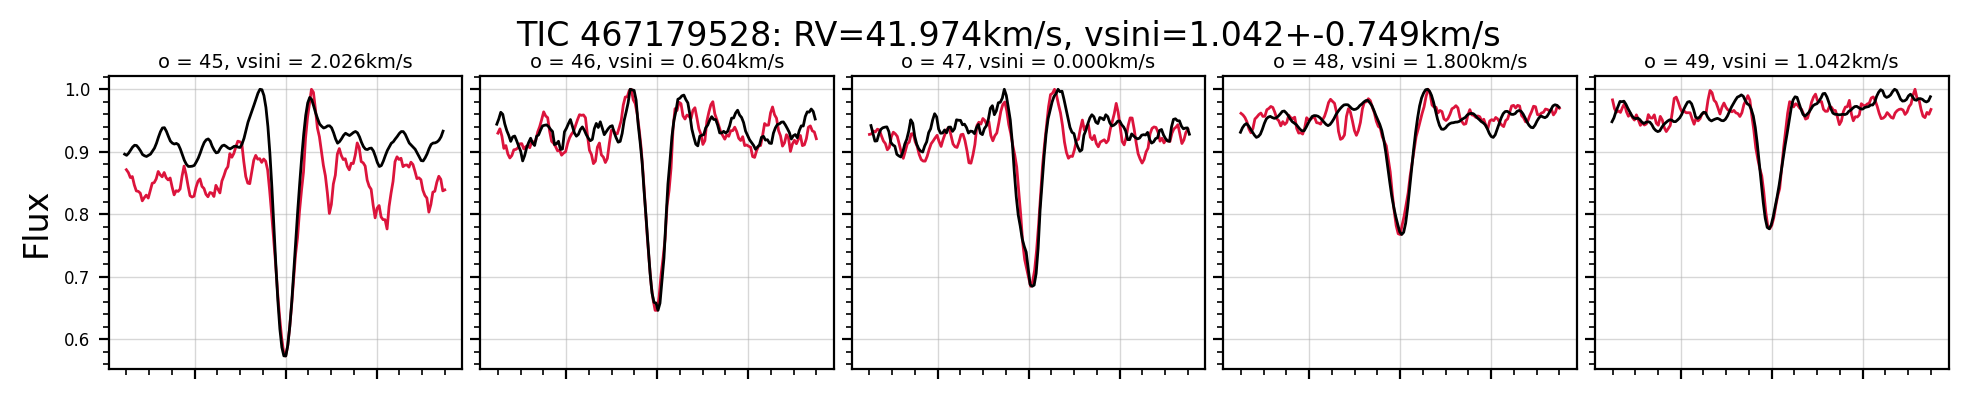

In [7]:
ftarg = "../neidspec/data/neid/spectra/neidL2_20220429T075531.fits"
fcal  = "../neidspec/data/neid/spectra/neidL2_20220410T085645.fits"
spec_help.vsini_from_neid_spectra(ftarg,fcal,plot=True,orders=[55,56,57,58,59])

In [8]:
# Slow rotator G 9-40
ftarg = "../hpfspec/data/hpf/spectra/G_9-40/Slope-20190301T024821_R01.optimal.fits"
fcal = "../hpfspec/data/hpf/spectra/GJ_699/Slope-20181003T014556_R01.optimal.fits"
spec_help.vsini_from_hpf_spectra(ftarg,fcal,plot=True)

FileNotFoundError: [Errno 2] No such file or directory: '../hpfspec/data/hpf/spectra/G_9-40/Slope-20190301T024821_R01.optimal.fits'